# Introduction
<font color='orange'>[Google Colab]</font> In the previous Part, you collected the traffic images for 2019 and 2020 Jan. You've also set up the necessary things for GPU-based object detection to happen.

If we don't use GPU-based object detection, we will take approximately 120,000 seconds to complete detecting the objects in our ~60,000 image dataset.

That's roughly 33 hours.

In this Part, you will do the following:
1. Set up the runtime for GPU running
2. Load the two DataFrames
3. Test object detection on one image
4. Detect number of objects in all images
5. Updating the DataFrames with the vehicle count

This will be another long one - <font color='red'><strong>anticipate 4-5 hours for each folder's worth of images.</strong></font>

# Runtime and library setup
We'll need to do a few things before we can start detecting objects.

### Step 1: Change Google Colab runtime to GPU
1. Head to Runtime tab
2. Click on "Change runtime type"
3. Choose GPU from the dropdown button
4. Click "Save"

Your runtime is now GPU based.

### Step 2: Import os 
Import os first so that we can change our working directory.

In [1]:
# Step 2: Import os
import os

### Step 3: Change working directory to your current folder
We hope that you followed the previous Part's instructions, and have "cv2.cpython-36m-x86_64-linux-gnu.so" in your folder.

Before we import OpenCV, we need to make sure that our current working directory is our folder.

If we don't do that, when we import OpenCV we will end up importing the default version.

The easiest way is to:
1. Mount your Drive
2. Get the PATH of this project folder
3. Use chdir from os library to change your current folder directory.

Don't forget to check the current working directory with .getcwd!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 4: Import OpenCV first
Import cv2 and check its version to see if it's 4.5.0-pre or something later.

In [2]:
# Step 4: Import OpenCV first
import cv2
cv2.__version__

'4.6.0'

### Step 5: Install cvlib
Now that you're done with the latest version of OpenCV, you'll have to pip install cvlib next. 

cvlib is a fantastic library that makes it easy to use computer vision models. 

More information in the documentation at https://www.cvlib.net/

In [ ]:
# Step 5: Install cvlib
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046385 sha256=ac8aa1a90153ced10db48e5681e63fdf1b5c601f81f373854914d696a55048cd
  Stored in directory: /root/.cache/pip/wheels/8e/d7/31/bc643bd3a8b11a7368b1ab1d8a6299b33b462ed0b0683ddc5a
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=5485f69c6c9975f6b00b39164760dbded9ec24491e6e345f174b960585ce3e0a
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


### Step 6: Import libraries
Now that we're done setting the two important libraries up, we'll import the rest. Import:
- cvlib as cv
- pandas as pd
- cv2
- numpy as np
- matplotlib.pyplot as plt
- draw_bbox from cvlib.object_detection


In [4]:
# Step 6: Import libraries
# import cvlib as cv
import pandas as pd
# import cv2
import numpy as np
import matplotlib.pyplot as plt
# from cvlib.object_detection import draw_bbox

### Step 7: Read the two CSVs as DataFrames
Let's read our CSVs again into DataFrames, since we'll need to update their numbers.

In [5]:
# Step 7: Read the 2019 and 2020 CSVs
data_2019=pd.read_csv("formated_data_1709.csv")

# data_2020=pd.read_csv("/content/drive/MyDrive/traffic/formated_data_1709_2020.csv")

In [6]:
data_2019.sort_values(by='timestamp',inplace=True)
# data_2020.sort_values(by='timestamp',inplace=True)

# Single image analysis
Time to analyze the images! We'll start off with analyzing the individual images first, then retrieve the numbers of vehicles for all images.

### Step 8: Read first image from the 2019 folder
Using the imread method from the OpenCV/cv2 library, read the first image from the 2019_Jan folder, i.e. "car_image_2019_Jan/0.jpg" and save it into a variable.

In [7]:
# Step 8: Read the first image from 2019 folder
import glob
import os.path
allimages = glob.glob('car_image_2019_old/*.jpg')
print(len(allimages))



30235


In [8]:
from PIL import Image
img=Image.open(allimages[0])
img.show()

### Step 9: Detect common objects
With the read image, you can then use https://github.com/ultralytics/yolov5 to detect objects from cvlib with the image. 

https://github.com/ultralytics/yolov5/issues/36

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.13 torch-1.12.1+cu113 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 37.2/107.7 GB disk)


In [9]:
import torch
# PyTorch Hub Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5n - yolov5x6, custom

Using cache found in /Users/pratham/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-19 Python-3.8.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [12]:
# Inference
model.classes=[1,2,3,5,7] #[bicycle,cars,buses,motocycles,trucks]
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 480x640 6 cars
Speed: 4.7ms pre-process, 255.4ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
# Inference
model.classes=[1,2,3,5,7] #[bicycle,cars,buses,motocycles,trucks]
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 480x640 5 cars
Speed: 14.0ms pre-process, 634.8ms inference, 9.3ms NMS per image at shape (1, 3, 480, 640)


### Step 10: Get the details of the detection


In [13]:
# pandas data frame of  alll the detections
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,175.313583,131.413269,209.950455,155.200592,0.702808,2,car
1,297.871735,199.266281,355.711578,241.814072,0.693251,2,car
2,159.341095,90.626190,178.016113,105.755066,0.688547,2,car
3,242.309891,130.761871,267.420197,146.883789,0.328440,2,car
4,238.849762,79.486374,253.504211,88.947403,0.288365,2,car
5,301.500183,292.131561,378.976318,373.768463,0.284559,2,car


### Step 11: Draw bounding box in image


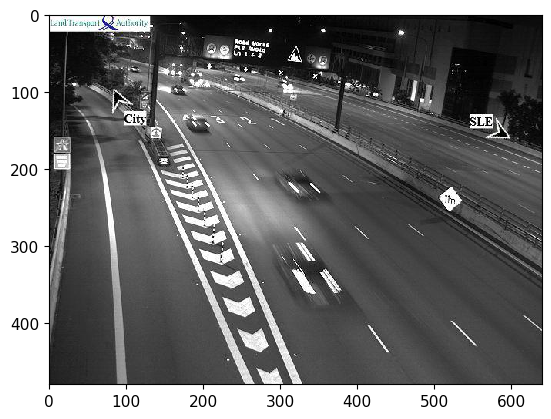

In [19]:
# Step 10: Print length of label
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
plt.imshow(results.imgs[0], interpolation='nearest')
plt.show()


# All image analysis
Now that we've done the basic image analysis, let's continue and analyze them all! 

### Step 12: Write getLabelCount


<details>
  <summary>Click here once if you're unsure and need pseudocode</summary>
  <ol>
    <li><strong>Define</strong> getLabelCount that takes in two arguments - (<font color='red'>index</font>, <font color='green'>folder_path</font>)</li>
    <li>Declare a variable temp_path that takes <font color='green'>folder_path</font> and combines it with the current value of the <font color='red'>index</font>, and '.jpg'</li>
    <li>Start a try/except block, where you first try to</li>
      <ul>
        <li>Use the .imread method with the the temp_path, and save it in a variable named temp_img</li> 
        <li>Get the bbox+label+conf with the .detect_common_objects method (don't forget the model and enable_gpu)</li>
      </ul>
    <li>If an exception occurs, just set label to be an empty list</li>
    <li>Return the length of the label</li>
  </ol>
</details>

### Step 14: Get a list of getLabelCount for 2019


In [ ]:
# Step 12: Write getLabelCount
from PIL import Image

# images path from folder path
import glob
import os.path
allimages = glob.glob('car_image_2019_old/*.jpg')
allimages.sort()

model.classes=[1,2,3,5,7] #[bicycle,cars,buses,motocycles,trucks]

labelcount=[]

for i in allimages:
  im = Image.open(i)  # PIL image
  results = model(im)
  labelcount.append(len(results.pandas().xyxy[0]))
  print(len(labelcount))

### Step 15: Add the length of labels to the 2019 DataFrame



In [22]:
while(len(data_2019) != len(labelcount)):
  labelcount.append(0)

In [23]:
data_2019["labelCount"]=labelcount

<AxesSubplot:ylabel='Frequency'>

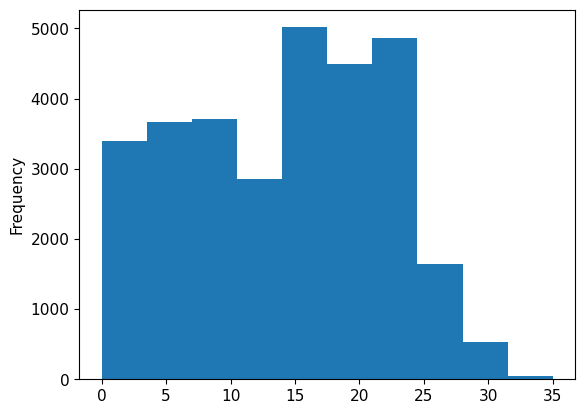

In [28]:
data_2019["labelCount"].plot(kind="hist")

### Step 16: Export the DataFrame into CSV



In [24]:
data_2019.to_csv("car_labelled_2019.csv")

### Step 17: Repeat for 2020 DataFrame
Now that you're done with the 2019 Jan data, next up - 2020 Jan data. 

You'll have to allocate another 4 hours for this so you can consider taking a break before coming back to this.

In [ ]:
# Step 17a: Get a list of number of vehicles 

from PIL import Image

# images path from folder path
import glob
import os.path
allimages = glob.glob('car_image_2020/*.jpg')
allimages.sort()

model.classes=[1,2,3,5,7] #[bicycle,cars,buses,motocycles,trucks]

labelcount=[]

for i in allimages:
  im = Image.open(i)  # PIL image
  results = model(im)
  labelcount.append(len(results.pandas().xyxy[0]))
  print(len(labelcount))

In [46]:
# Step 17b: Create a new column named num_cars in the 2020 DataFrame with the list
data_2020=pd.read_csv("formated_data_1709_2020.csv")
while(len(data_2020) != len(labelcount)):
  labelcount.append(0)
 
data_2020["labelCount"]=labelcount

In [47]:
# Step 17c: Export the DataFrame as CSV
data_2020.to_csv("car_labelled_2020.csv")

<AxesSubplot:ylabel='Frequency'>

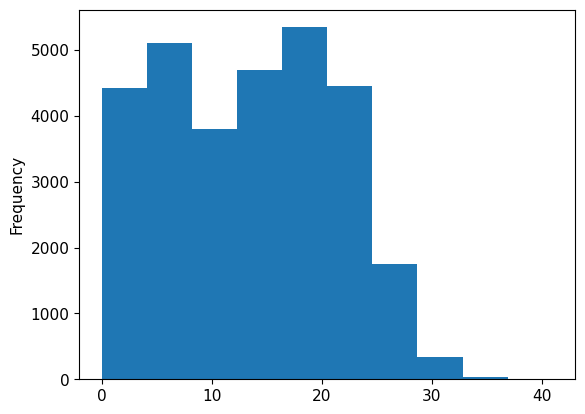

In [48]:
data_2020["labelCount"].plot(kind="hist")

# End of Part IV
